### Explore Tokenizing techniques

In [1]:
from keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']


tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

Using TensorFlow backend.


In [2]:
sequences = tokenizer.texts_to_sequences(samples)

In [3]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [4]:
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

In [5]:
one_hot_results

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [6]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


Hashing Trick, need hashing space much higher dimensionality than samples to avoid hash collisions

In [7]:
import matplotlib.pyplot as plt
import numpy as np


def print_curves(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, label='Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')

    plt.figure()

    plt.plot(epochs, loss, label='Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')

    plt.show()
    return

### IMDB and Embeddings

In [8]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [9]:
from keras import models
from keras.layers import Dense, Flatten, Embedding

model = models.Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))

model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(
    x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 150us/step - loss: 0.6759 - acc: 0.6050 - val_loss: 0.6398 - val_acc: 0.6812
Epoch 2/10
20000/20000 [==============================] - 2s 116us/step - loss: 0.5657 - acc: 0.7427 - val_loss: 0.5467 - val_acc: 0.7204
Epoch 3/10
20000/20000 [==============================] - 2s 117us/step - loss: 0.4752 - acc: 0.7808 - val_loss: 0.5113 - val_acc: 0.7384
Epoch 4/10
20000/20000 [==============================] - 2s 117us/step - loss: 0.4263 - acc: 0.8078 - val_loss: 0.5008 - val_acc: 0.7454
Epoch 5/10
20000/20000 [==============================] - 2s 116us/step - loss: 0.3930 - acc: 0.8257 - val_loss: 0.4981 - val_acc: 0.7538
Epoch 6/10
20000/20000 [==============================] - 2s 117us/step - loss: 0.3668 - acc: 0.8396 - val_loss: 0.5014 - val_acc: 0.7532
Epoch 7/10
20000/20000 [==============================] - 2s 116us/step - loss: 0.3435 - acc: 0.8533 - val_loss: 0.5052 - v

### IMDB revisited with pre-trained embeddings

In [11]:
import os

imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

Using pre-trained embeddings with only first 200 examples!

In [12]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

Found 88584 unique tokens.


In [13]:
texts[0]

'this is quite possibly the worst acting i have ever seen in a movie... ever. and what is up with the casting. the leading lady in this movie has some kind of nose dis-figuration and is almost impossible to look at for any period of time without becoming fixated on her nose. you could go to your local grocery store on a Sunday afternoon and easily find 50 more qualified, better looking possible leading ladies. i made the unfortunate mistake of renting this movie because it had a "cool" DVD case. This movie looks like it is just some class project for a group of multimedia students at a local technical college. i would rather have spent the hour or so that this movie was on watching public access television... at least the special effects are better and the people on there are more attractive than anyone you will see in this film'

In [14]:
labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of labels tensor:', labels.shape)

('Shape of data tensor:', (25000, 100))
('Shape of labels tensor:', (25000,))


In [15]:
# shuffle data since we started with all negative, then positive
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    data, labels, train_size=training_samples, shuffle=True)

/home/dhodun/.local/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
y_train.shape

(200,)

In [17]:
#! wget http://nlp.stanford.edu/data/glove.6B.zip
#! unzip glove.6B.zip -d glove.6B

In [18]:
glove_dir = './glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors: ' % len(embeddings_index))

Found 400000 word vectors: 


In [19]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
    # matrix is already sorted in order of word frequency, so grab the first
    # 'max_words'
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
# max_words and embedding_dim = 100
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers[0].set_weights(np.expand_dims(embedding_matrix, axis=0))

# could also address model.layers[0]

model.layers[0].trainable = False

In [22]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(
        x_val,
        y_val))

model.save_weights('./models/pre_trained_glove_model.h5')

Train on 200 samples, validate on 24800 samples
Epoch 1/10
200/200 [==============================] - 1s 6ms/step - loss: 1.8150 - acc: 0.4750 - val_loss: 1.0180 - val_acc: 0.4996
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.6115 - acc: 0.6900 - val_loss: 0.7651 - val_acc: 0.5004
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.6116 - acc: 0.6500 - val_loss: 0.6957 - val_acc: 0.5249
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3970 - acc: 0.8900 - val_loss: 0.6841 - val_acc: 0.5657
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.3013 - acc: 0.8950 - val_loss: 0.8056 - val_acc: 0.5273
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1991 - acc: 0.9600 - val_loss: 1.3305 - val_acc: 0.5004
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.1968 - acc: 0.9400 - val_loss: 0.7406 - val_acc: 0.5622
Epoch 8/10
200/200 [========

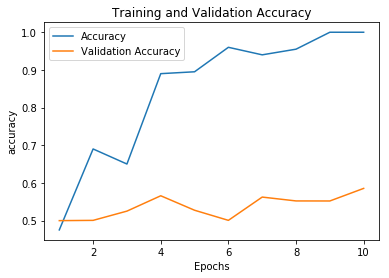

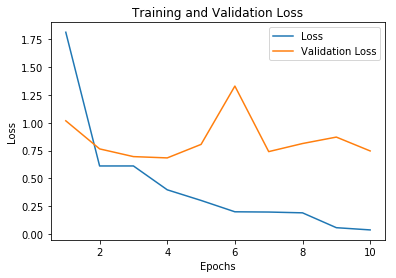

In [23]:
print_curves(history)

### Try Model without initializing

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 24800 samples
Epoch 1/10
200/200 [==============================] - 1s 7ms/step - loss: 0.6951 - acc: 0.4850 - val_loss: 0.6923 - val_acc: 0.5138
Epoch 2/10
200/200 [==============================] - 1s 6ms/step - loss: 0.4879 - a

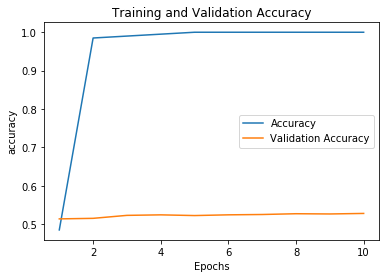

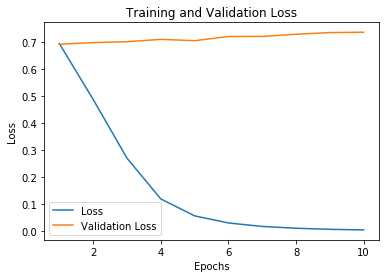

In [24]:
model = Sequential()
# max_words and embedding_dim = 100
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_data=(
        x_val,
        y_val))

print_curves(history)

In [25]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

Load first model and test on test data

In [26]:
model.load_weights('./models/pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 1s 51us/step


[0.7601913145446777, 0.57284000000000002]

54% is pretty bad, we're only training on 200 samples